In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from google.colab import files
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os


In [15]:
print()
files.upload()

Saving forestfires.csv to forestfires (1).csv


{'forestfires (1).csv': b'X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area\n7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0,0\n7,4,oct,tue,90.6,35.4,669.1,6.7,18,33,0.9,0,0\n7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0,0\n8,6,mar,fri,91.7,33.3,77.5,9,8.3,97,4,0.2,0\n8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0,0\n8,6,aug,sun,92.3,85.3,488,14.7,22.2,29,5.4,0,0\n8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0,0\n8,6,aug,mon,91.5,145.4,608.2,10.7,8,86,2.2,0,0\n8,6,sep,tue,91,129.5,692.6,7,13.1,63,5.4,0,0\n7,5,sep,sat,92.5,88,698.6,7.1,22.8,40,4,0,0\n7,5,sep,sat,92.5,88,698.6,7.1,17.8,51,7.2,0,0\n7,5,sep,sat,92.8,73.2,713,22.6,19.3,38,4,0,0\n6,5,aug,fri,63.5,70.8,665.3,0.8,17,72,6.7,0,0\n6,5,sep,mon,90.9,126.5,686.5,7,21.3,42,2.2,0,0\n6,5,sep,wed,92.9,133.3,699.6,9.2,26.4,21,4.5,0,0\n6,5,sep,fri,93.3,141.2,713.9,13.9,22.9,44,5.4,0,0\n5,5,mar,sat,91.7,35.8,80.8,7.8,15.1,27,5.4,0,0\n8,5,oct,mon,84.9,32.8,664.2,3,16.7,47,4.9,0,0\n6,4,mar,wed,89.2,27.9,70.8,6.3,15.9,35,4,0,0\n6,4,apr,sat,86.3,

In [22]:
print("Dataset berhasil dimuat. 5 baris pertama:")
print(df.head())
print("\n")

Dataset berhasil dimuat. 5 baris pertama:
   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  \
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0   
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0   
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0   
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0   
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0   

   area_log  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  




In [30]:
df = pd.read_csv('forestfires.csv')
df['area_log'] = np.log1p(df['area'])
X = df.drop(['area', 'area_log'], axis=1)
y = df['area_log']
X = pd.get_dummies(X, columns=['month', 'day'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
print("\nMelatih model Stacking Regressor...")
stacking_regressor.fit(X_train, y_train)


Melatih model Stacking Regressor...


StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                              ('gb',
                               GradientBoostingRegressor(random_state=42))],
                  final_estimator=LinearRegression())

In [32]:
y_pred_stacking = stacking_regressor.predict(X_test)
mae_stacking = mean_absolute_error(y_test, y_pred_stacking)
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)

print("\n--- Hasil Evaluasi Stacking Regressor ---")
print(f"Mean Absolute Error (MAE): {mae_stacking:.4f}")
print(f"Mean Squared Error (MSE): {mse_stacking:.4f}")
print(f"R-squared ($R^2$): {r2_stacking:.4f}")


--- Hasil Evaluasi Stacking Regressor ---
Mean Absolute Error (MAE): 1.1976
Mean Squared Error (MSE): 2.2228
R-squared ($R^2$): -0.0114


Plot perbandingan aktual vs prediksi telah disimpan sebagai 'stacking_actual_vs_predicted.png'


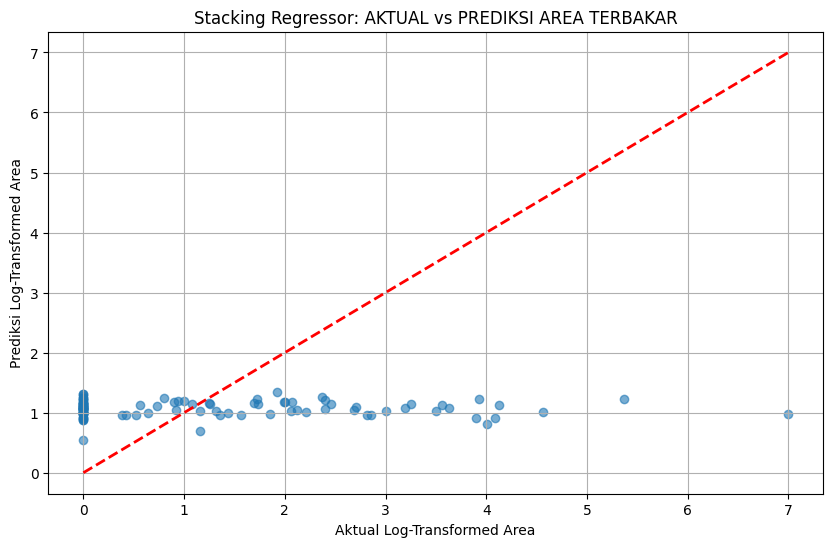

In [34]:
# Membuat scatter plot perbandingan nilai aktual dan prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_stacking, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Stacking Regressor: AKTUAL vs PREDIKSI AREA TERBAKAR')
plt.xlabel('Aktual Log-Transformed Area')
plt.ylabel('Prediksi Log-Transformed Area')
plt.grid(True)
plt.savefig('stacking_actual_vs_predicted.png')
print("Plot perbandingan aktual vs prediksi telah disimpan sebagai 'stacking_actual_vs_predicted.png'")

/tmp/ipython-input-3409079605.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_area_median.values, y=monthly_area_median.index, orient='h', palette='viridis')


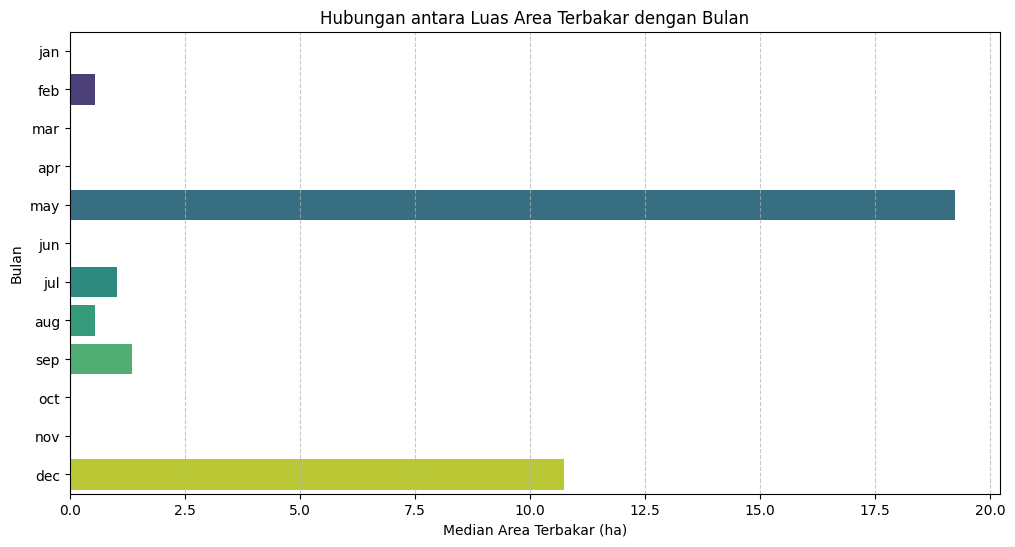

In [35]:
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
monthly_area_median = df.groupby('month')['area'].median().reindex(month_order)

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_area_median.values, y=monthly_area_median.index, orient='h', palette='viridis')
plt.title('Hubungan antara Luas Area Terbakar dengan Bulan')
plt.xlabel('Median Area Terbakar (ha)')
plt.ylabel('Bulan')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

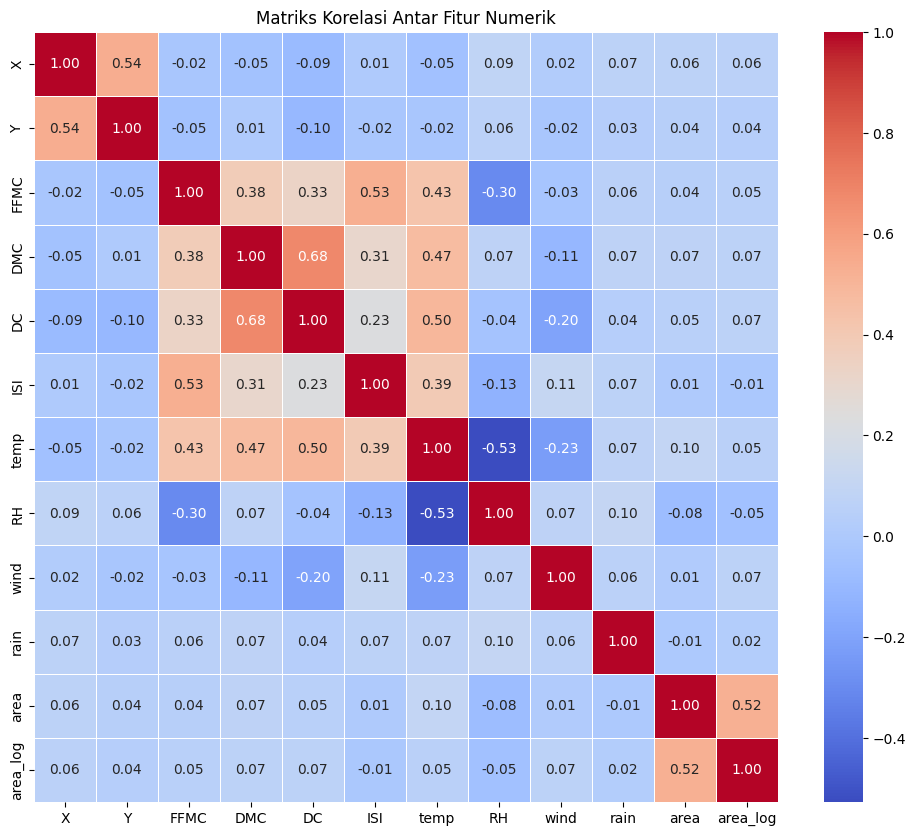

In [36]:
df_numeric = df.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriks Korelasi Antar Fitur Numerik')
plt.show()

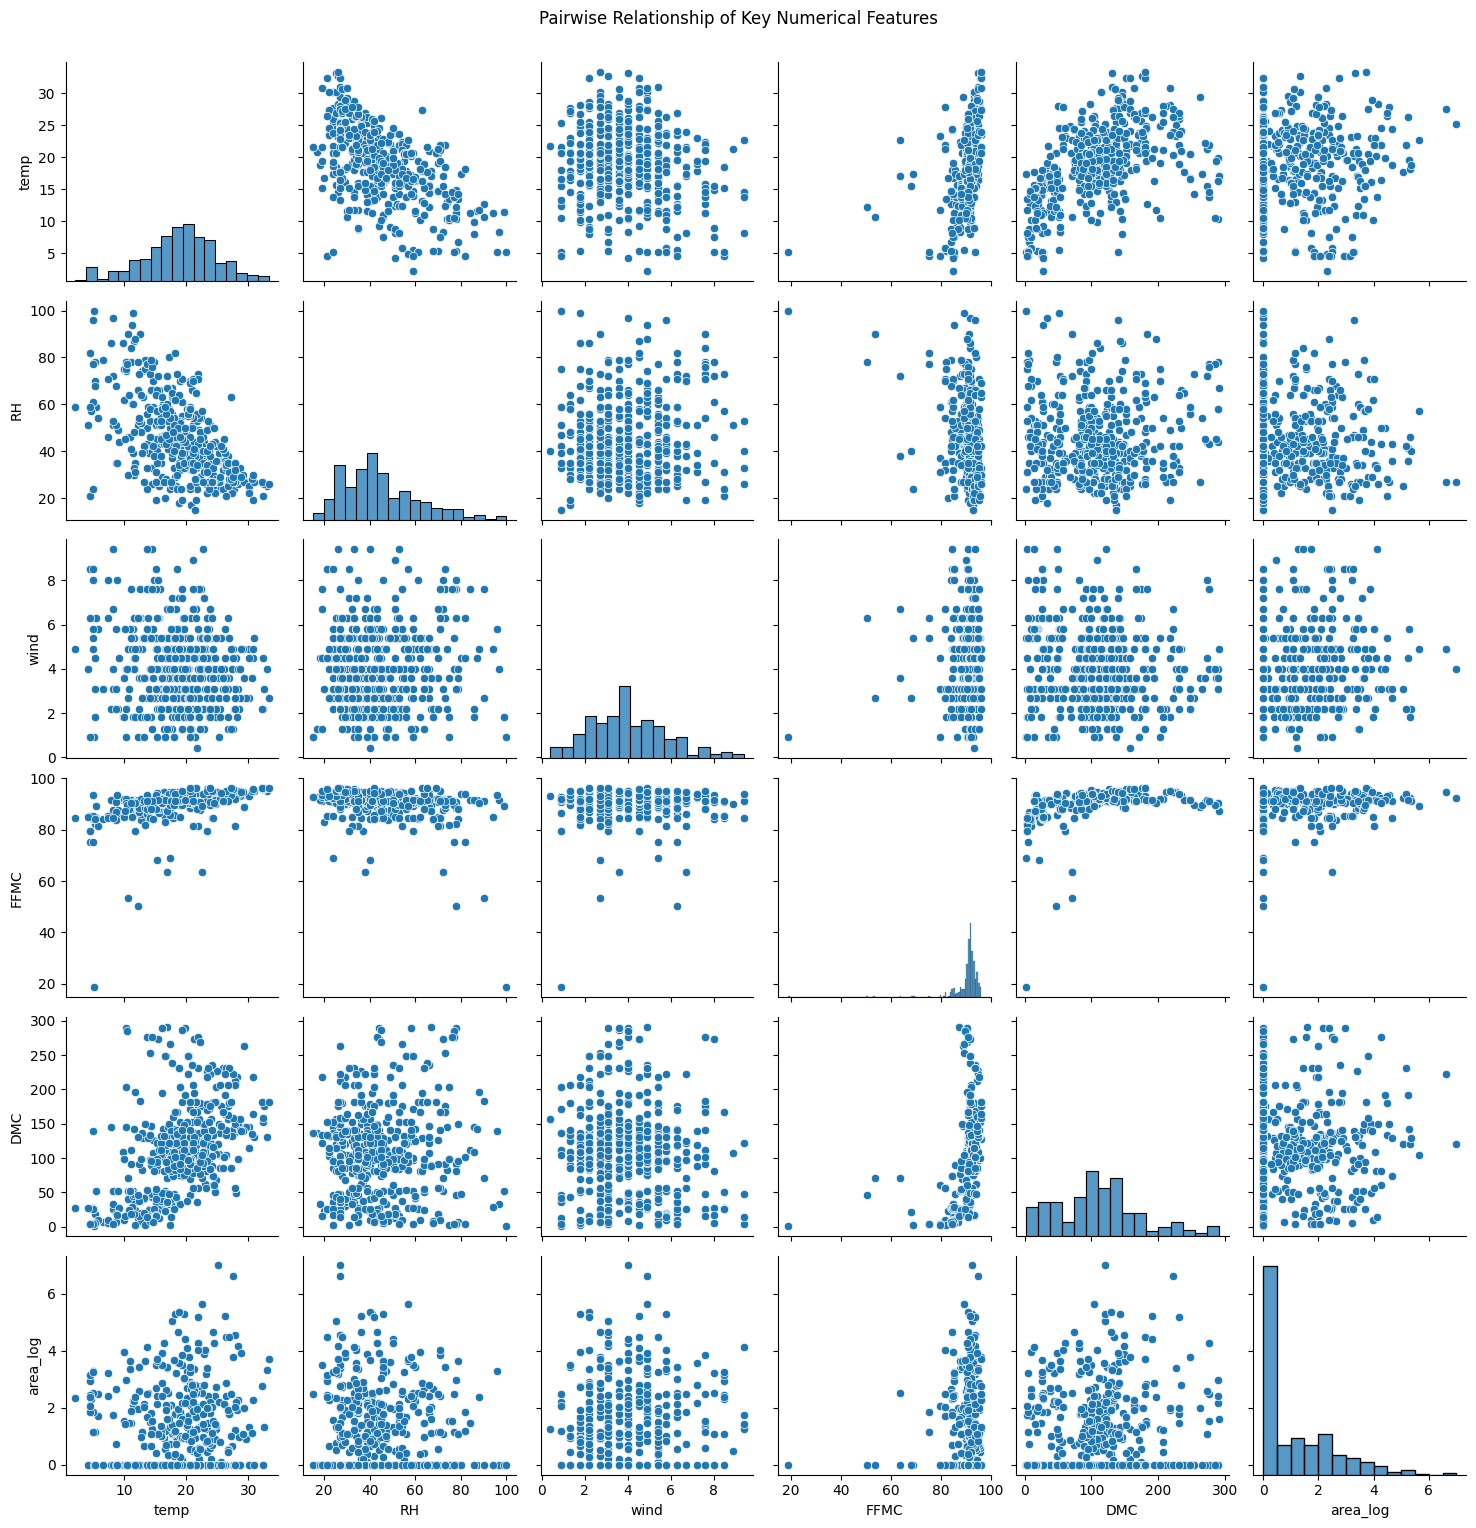

In [37]:
df['area_log'] = np.log1p(df['area'])
features_for_pairplot = ['temp', 'RH', 'wind', 'FFMC', 'DMC', 'area_log']
sns.pairplot(df[features_for_pairplot])
plt.suptitle('Pairwise Relationship of Key Numerical Features', y=1.02)
plt.show()